<a href="https://colab.research.google.com/github/kofibeans/APM1111-FA6/blob/main/AQUINO_APM1111_FA6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **APM1111 Formative Assessment 6**

**Instruction**

Provide an R or Python (with markdown) file for the independent samples t-test for Invisibility Cloak data set.

*   The file should have all the codes/and or explanations from Assumption 1 to 5 and computation.
*   Present the results of the analysis by making a short report.

### **Import Library and Dataset**
Import couple of Python library required for the analysis and create the dataset.

In [ ]:
# import library

import numpy as np
import pandas as pd # data processing, csv file i/o (e.g. pd.read_csv)
import scipy.stats as stats # statistical operations
from scipy.stats import ttest_ind

# visualization tools
import matplotlib.pyplot as plt
from IPython.display import display

!pip install ptitprince
import ptitprince as pt

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

!pip install researchpy
import researchpy as rp # statistical operations

In [ ]:
# create the dataset
data = {
    'Participant': list(range(1, 25)),
    'Cloak': [0]*12 + [1]*12,
    'Mischief': [3, 1, 5, 4, 6, 4, 6, 2, 0, 5, 4, 5, 4, 3, 6, 6, 8, 5, 5, 4, 2, 5, 7, 5]
}

df = pd.DataFrame(data)
df.style

,Participant,Cloak,Mischief
0,1,0,3
1,2,0,1
2,3,0,5
3,4,0,4
4,5,0,6
5,6,0,4
6,7,0,6
7,8,0,2
8,9,0,0
9,10,0,5


### **Assumption Check**
Before the t-test can be interpreted, one needs to test the assumptions to consider the results as valid.

**Assumption 1.** The dependent variable (Mischief) is a *continuous* level.

**Assumption 2.** The independent variable (Cloak) consists of two *categorical*, independent
groups (With a cloak, Without a cloak).

**Assumption 3.** Each participant is present to only one group.

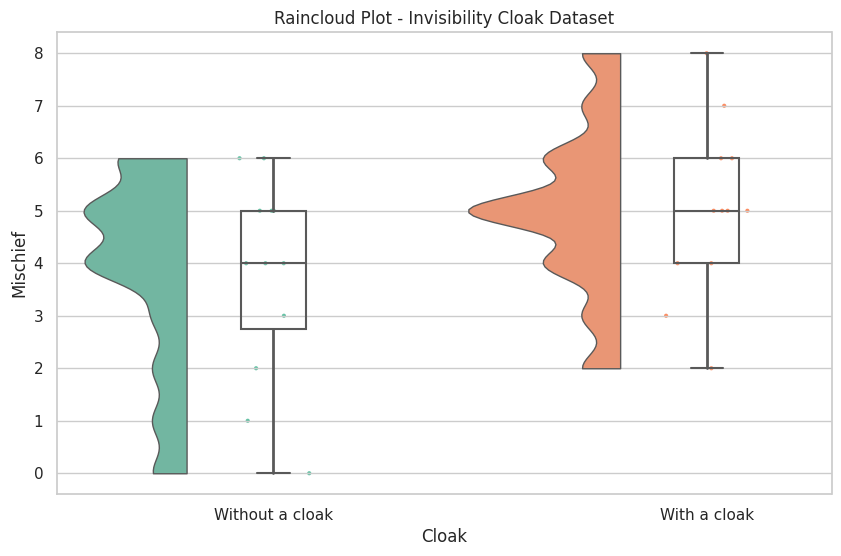

In [ ]:
# creating the raincloud plot
plt.figure(figsize=(10, 6))

pt.RainCloud(x='Cloak', y='Mischief', data=df, palette="Set2")

plt.xticks([0, 1], ['Without a cloak', 'With a cloak'])
plt.title("Raincloud Plot - Invisibility Cloak Dataset")
plt.xlabel("Cloak")
plt.ylabel("Mischief")

plt.show()

**Assumption 4. Outliers** There are *no significant outliers* in the two groups of independent variable (Cloak) in terms of the dependent variable (Mischief), as assessed by visual inspection of boxplots.

**Assumption 5. Normality.** The dependent variable (Mischief) for each group (Cloak) is normally distributed (p > 0.05), as assessed by Shapiro-Wilk test.

In [ ]:
# checking the normality assumption for each group using Shapiro-Wilk test
group_0 = df[df['Cloak'] == 0]['Mischief']
group_1 = df[df['Cloak'] == 1]['Mischief']

shapiro_0 = stats.shapiro(group_0)
shapiro_1 = stats.shapiro(group_1)

# creating a table for the Shapiro-Wilk test results
results = pd.DataFrame({'Mischief': ['Without a cloak', 'With a cloak'],
                        'W-statistic': [shapiro_0.statistic, shapiro_1.statistic],
                       'p-value': [shapiro_0.pvalue, shapiro_1.pvalue]})

print("\nTest of Normality (Shapiro-Wilk)")

results.style


Test of Normality (Shapiro-Wilk)


,Mischief,W-statistic,p-value
0,Without a cloak,0.912764,0.231446
1,With a cloak,0.972617,0.936188


*Note.* Significant results suggest a deviation from normality.

**Assumption 6. Homogeneity of variances.** There is equality of variances between groups (Without a cloak, With a cloak) on their number of mischievous acts (Mischief), as assessed by Levene’s test of equality of variances.


In [ ]:
# fit the model
model = ols('Mischief ~ C(Cloak)', data=df).fit()

# perform ANOVA and get the results
anova_results = anova_lm(model)

# create a dictionary with the results
results = {
    'Source': ['Mischief'],
    'F-value': anova_results['F'][0],
    'df': anova_results['df'][0],
    'p-value': anova_results['PR(>F)'][0]
}

# create a DataFrame with the results
results_df = pd.DataFrame(results)

# print the DataFrame
results_df.style

,Source,F-value,df,p-value
0,Mischief,2.935943,1.000000,0.100686


### **Computation**

**the summary statistical information**

In [ ]:
group_0 = df[df['Cloak'] == 0]['Mischief']
group_1 = df[df['Cloak'] == 1]['Mischief']

# summary and results information
summary, results = rp.ttest(group_0, group_1)

# print the summary
summary.style

/usr/local/lib/python3.10/dist-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Mischief,12.000000,3.750000,1.912875,0.552199,2.534617,4.965383
1,Mischief,12.000000,5.000000,1.651446,0.476731,3.950721,6.049279
2,combined,24.000000,4.375000,1.860633,0.379800,3.589323,5.160677


**the statistical test information**

In [ ]:
# define the two groups of data
group_0 = [3, 1, 5, 4, 6, 4, 6, 2, 0, 5, 4, 5]
group_1 = [4, 3, 6, 6, 8, 5, 5, 4, 2, 5, 7, 5]

# perform independent samples t-test
t_statistic, p_value = ttest_ind(group_0, group_1)

# calculate mean difference
mean_difference = np.mean(group_0) - np.mean(group_1)

# calculate standard error of the difference
se_difference = np.sqrt(np.var(group_0, ddof = 1)/len(group_0) + np.var(group_1,ddof = 1)/len(group_1))

# calculate 95% CI for mean difference
ci_lower = mean_difference - 1.96 * se_difference
ci_upper = mean_difference + 1.96 * se_difference

# create a dictionary with the results
results = {
    't': [t_statistic],
    'df': [len(group_0) + len(group_1) - 2],
    'p-value': [p_value],
    'Mean Difference': [mean_difference],
    'SE Difference': [se_difference],
    '95% CI (Lower)': [ci_lower],
    '95% CI (Upper)': [ci_upper]
}

# create a dataframe from the dictionary
df_results = pd.DataFrame(results)

# format float of the dataframe
df_results.style.format("{:,.3f}")

,t,df,p-value,Mean Difference,SE Difference,95% CI (Lower),95% CI (Upper)
0,-1.713,22.000,0.101,-1.250,0.730,-2.680,0.180


### **Presenting the results**

The mean of mischievous acts committed was signigicantly greater for people with invisibility cloak (M = 5.00, SD =	1.65, n = 12) than for people without invisibility cloak (M = 3.75,	SD = 1.91, n = 12), t(46) = -1.713, p = 0.101, d = -1.250, 95% CI [-2.68 0.18].